<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/balance_reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Balance de materia en reactor

Nombre: Juan Manuel G.G

Fecha: 11 de diciembre

Cargar librerías


In [58]:
install.packages("deSolve")
install.packages("FME")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rootSolve’, ‘coda’, ‘minpack.lm’, ‘minqa’




In [59]:
source("Grind.R")

Loading required package: coda



grind.R was sourced


## Balance de materia

### Balance de masa 

Consideramos un bioreactor en el cuál se presenta un flujo de masa en la entrada y en la salidad. La densidad en el biorreactor permanece constante, es decir, la densidad es la misma en la entrada y en la salida. Se tiene entonces.

$$\frac{dm}{dt} = q_{e} \rho - q_{s} \rho$$

$$\frac{dm}{dt} = \rho (q_{e} - q_{s} )$$

$\rho$ es la densidad, $q_{e}$ es el caudal en la entrada y $q_{s}$ es el caudal en la salida 

Considerando que $m = \rho V$

$$ \frac{d(\rho V)}{dt} = \rho * (q_{e} - q_{s})$$

$$ \rho\frac{dV}{dt} + V\frac{d \rho}{dt}= \rho * (q_{e} - q_{s})$$


$$ \frac{dV}{dt}= q_{e} - q_{s}$$

### Balance por especie 

Considerando una especie A, la cual está presente en los flujos de entrada y de salida y además participa en reacciones generación y consumo, el balance general para esta especie es.

$$\frac{dm_{A}}{dt} = q_{e} c_{Ae} - q_{s} c_{A} + r_{g} V - r_{c} V$$

Considerando que $m_{A} = c_{A} V$

$$\frac{d(c_{A} V)}{dt} = q_{e} c_{Ae} - q_{s} c_{A} + r_{g} V - r_{c} V$$

$$c_{A}\frac{dV}{dt} + V\frac{dc_{A}}{dt} = q_{e} c_{Ae} - q_{s} c_{A} + r_{g} V - r_{c} V$$

$$ \frac{dc_{A}}{dt} = \frac{q_{e}}{V} c_{Ae} - \frac{q_{s}}{V} c_{A} + r_{g}  - r_{c}  - \frac{(q_{e} - q_{s})}{V}c_{A}$$

$$ \frac{dc_{A}}{dt} = \frac{q_{e}}{V}(c_{Ae} - c_{A})+ r_{g}  - r_{c} $$

Ahora consideramos un reactor en el que se encuentran dos especies $A$ y $B$. Donde $A$ se transforma en $B$ mediante una reacción simple. 

$$A \rightarrow B$$

La especie A es alimentada al reactor a una concentración $c_{Ain}$, mientras que la especie $B$ es producida en el reactor. Considerando que la velocidad a la que ocurre la reacción es $r = kAB$, y que los flujos en la entrada y en la salida, se tiene el siguiente modelo para describir el proceso

$$\frac{dc_{A}}{dt} = \frac{q_{e}}{V} (c_{Ain} - c_{A}) - kc_{A}c_{B}$$

$$\frac{dc_{B}}{dt} = - \frac{q_{e}}{V}c_{B} + kc_{A}c_{B}$$


$$\frac{dV}{dt} = q_{e} - q_{s}$$

Vamos a divertirnos :D

# Establecer modelo 

In [47]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dca <- qe/V*(cain - ca) - k*ca*cb
    dcb <- - qe/V*cb + k*ca*cb 
    dV <- qe - qs

    return(list(c(dca, dcb, dV)))
  })
}

Establecer valores de parámetros 

In [48]:
p <- c(qe = 1, qs = 1, cain = 10, k = 0.1)

Establecer condiciones iniciales

In [49]:
s <- c(ca = 5, cb = 0.5, V = 10)

Intervalo de la simulación 

In [53]:
times <- seq(0,50,1)

Resolver sistema 

In [54]:
out <- ode(y = s, parms = p, times = times, func = model, method = "rk4")

Mostrar resultados 

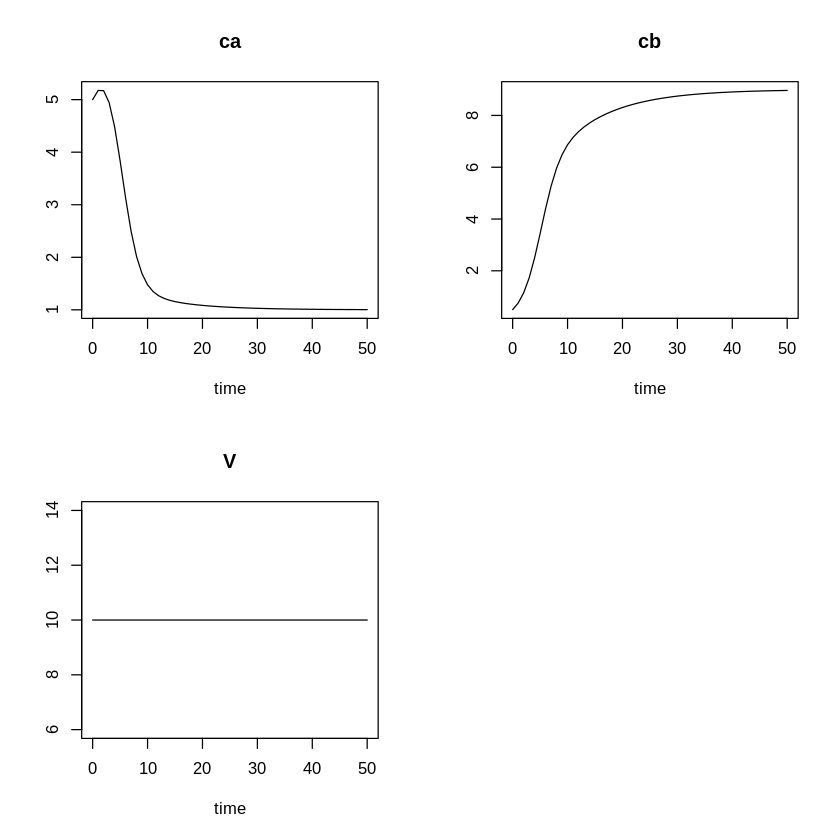

In [72]:
plot(out)

# Análisis de estabilidad

A partir de las ceroclinas es posible obtener los puntos de equilibrio. Empezamos por considerar el caso en el que $q_{e} = q_{s}$, y por lo tanto $\frac{dV}{dt} = 0$. Además, $D = \frac{q_{e}}{V}$.

$$\frac{dc_{A}}{dt} = D (c_{Ae} - c_{A}) - kc_{A}c_{B}$$

$$\frac{dc_{B}}{dt} = - Dc_{B} + kc_{A}c_{B}$$

$$ \frac{dc_{B}}{dt} = 0 \hspace{1cm} \rightarrow \hspace{1cm} c_{B} = 0, \hspace{1cm} c_{A} = \frac{D}{k} $$

$$ \frac{dc_{A}}{dt} = 0 \hspace{1cm} \rightarrow \hspace{1cm} c_{B} = c_{Ain} - \frac{D}{k} $$

Vemos que existen dos punto de equilibrio ($c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ain} - \frac{D}{k}$) y ($c_{Ass} = c_{Ae}, c_{Bss} = 0$). A continuación analizamos su estabilidad.

In [65]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dca <- D*(cain - ca) - k*ca*cb 
    dcb <- -D*cb + k*ca*cb 

    return(list(c(dca, dcb)))
  })
}

In [67]:
p <- c(D = 0.1, cain = 10, k = 0.1)
s <- c(ca = 5, cb = 0.5)

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 


ca cb 
 1  9

ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 


ca cb 
10  0

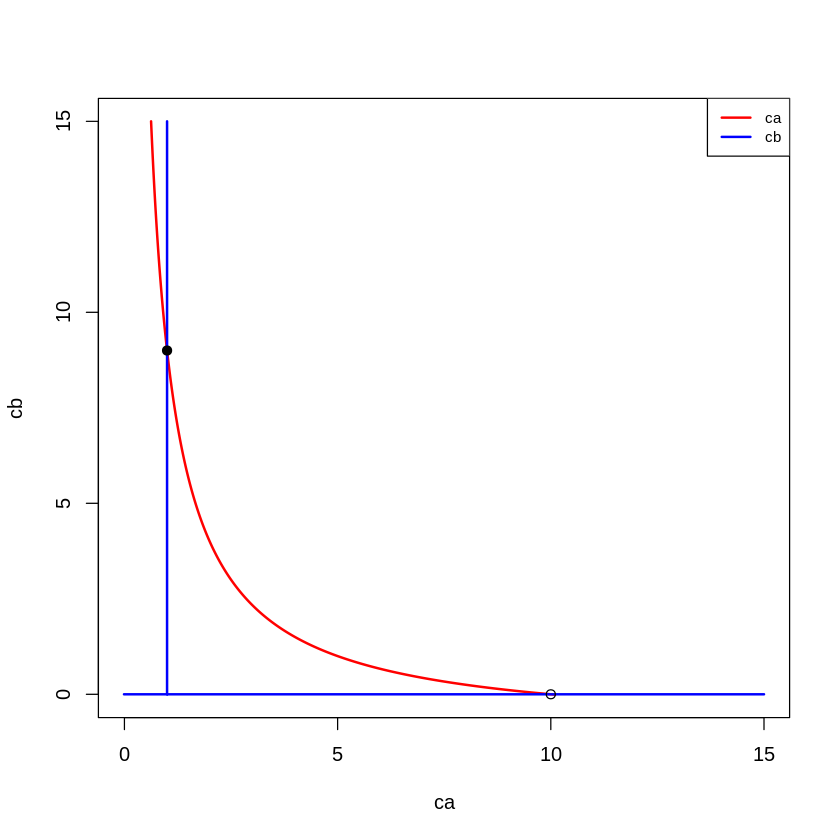

In [77]:
plane(xmax = 15, ymax = 15, xmin = -0.01, ymin = -0.01)
newton(state = c(ca = 1, cb = 10), plot = TRUE)
newton(state = c(ca = 10, cb = 0), plot = TRUE)

De acuerdo con los eigenvalores, el punto de equilibrio ($c_{Ass} = \frac{D}{k}, c_{Bss} = c_{Ae} - \frac{D}{k}$) es estable, mientras que el punto ($c_{Ass} = c_{Ain}, c_{Bss} = 0$) es inestable.

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 


ca cb 
 1  9

ca       cb 
1.000026 8.999770

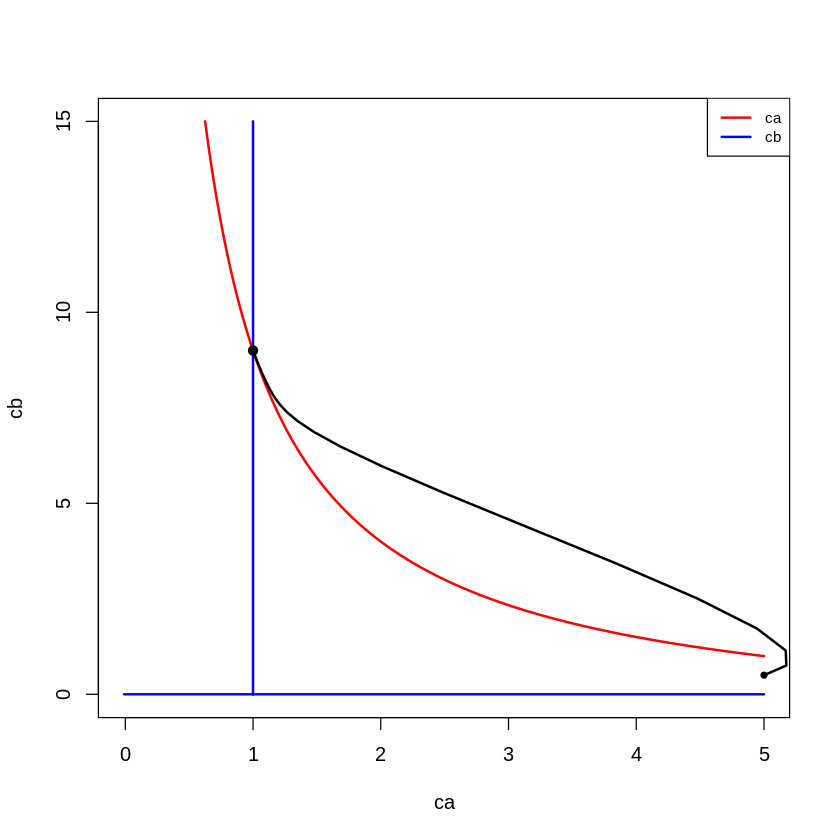

In [76]:
plane(xmax = 5, ymax = 15, xmin = -0.01, ymin = -0.01)
newton(state = c(ca = 1, cb = 10), plot = T)
run(traject = TRUE)

Ahora podríamos preguntarnos cómo afecta el valor del parámetros $D$ la estabilidad de estos puntos de equilibrio. Esta pregunta es importante porque en un reactor químico, este parámetro se puede modificar con el objetivo de incrementar el rendimiento o la productividad del proceso. 

ca cb 
 1  9 
Stable point, eigenvalues:  -0.9 -0.1 
ca cb 
10  0 
Unstable point, eigenvalues:  0.9 -0.1 


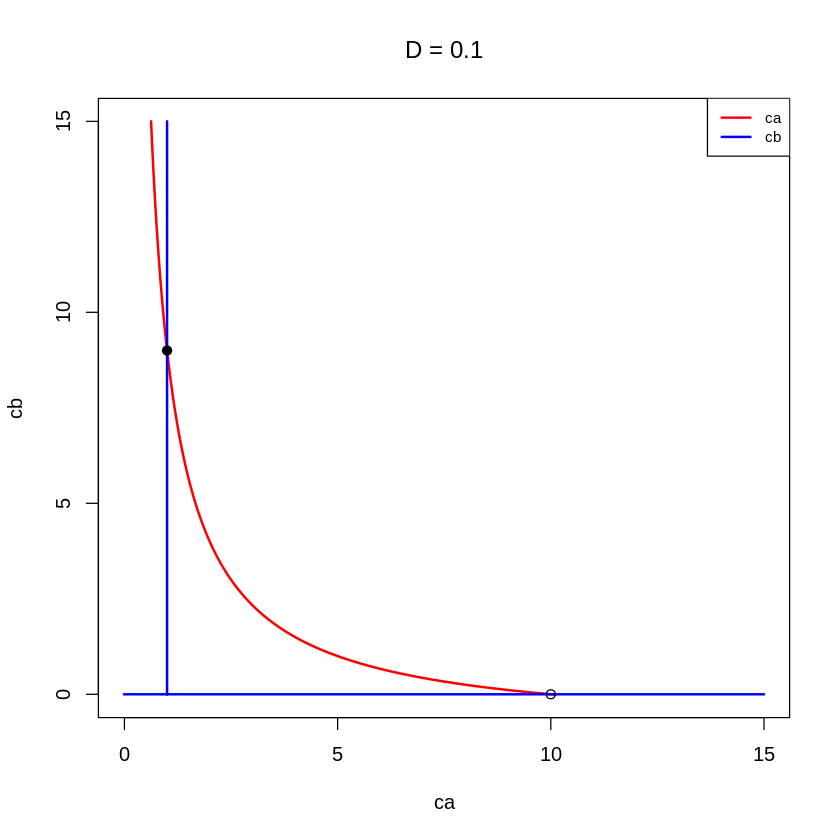

ca cb 
 5  5 
Stable point, eigenvalues:  -0.5000042 -0.4999958 
ca cb 
10  0 
Unstable point, eigenvalues:  0.5 -0.5 


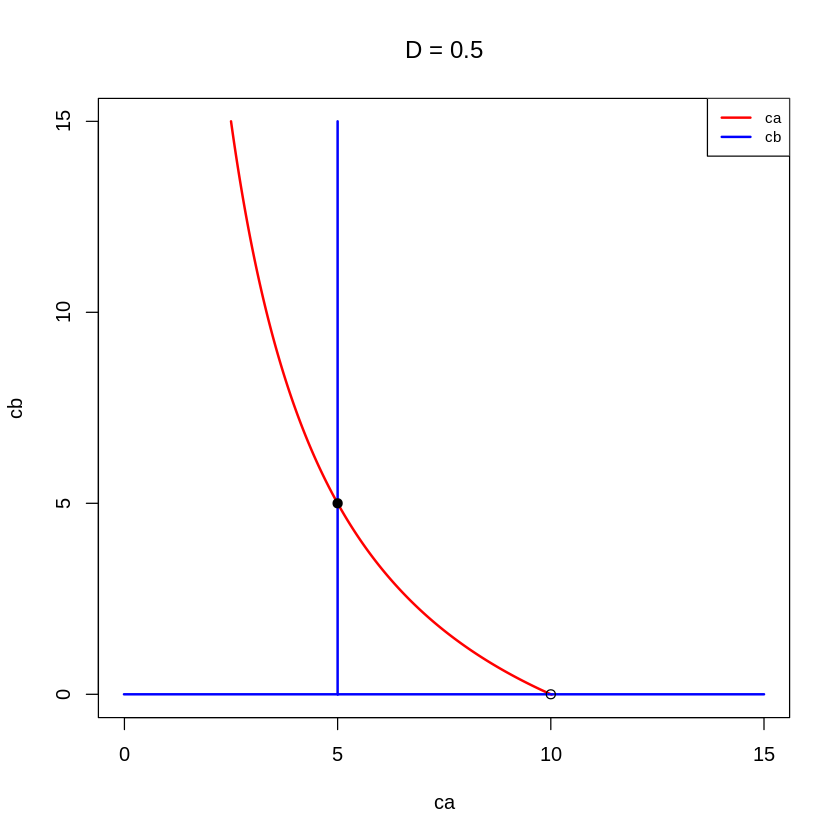

          ca           cb 
9.9997108861 0.0002891139 
Stable point, eigenvalues:  -1 -5.782278e-05 
ca cb 
10  0 
Unstable point, eigenvalues:  -1 0 


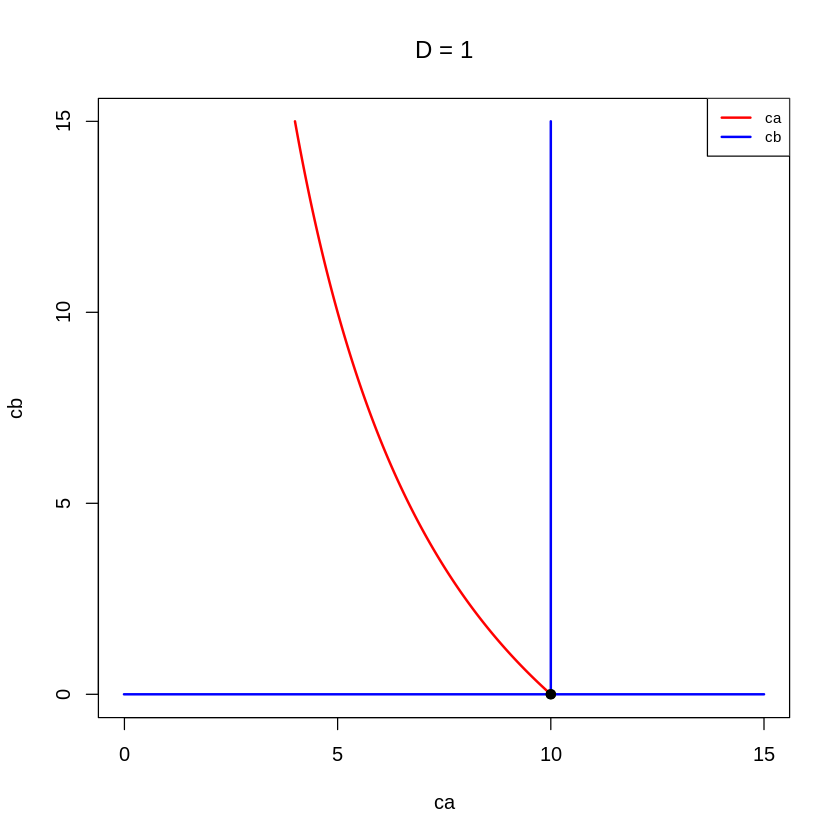

ca cb 
10  0 
Stable point, eigenvalues:  -1.5 -0.5 
ca cb 
10  0 
Stable point, eigenvalues:  -1.5 -0.5 


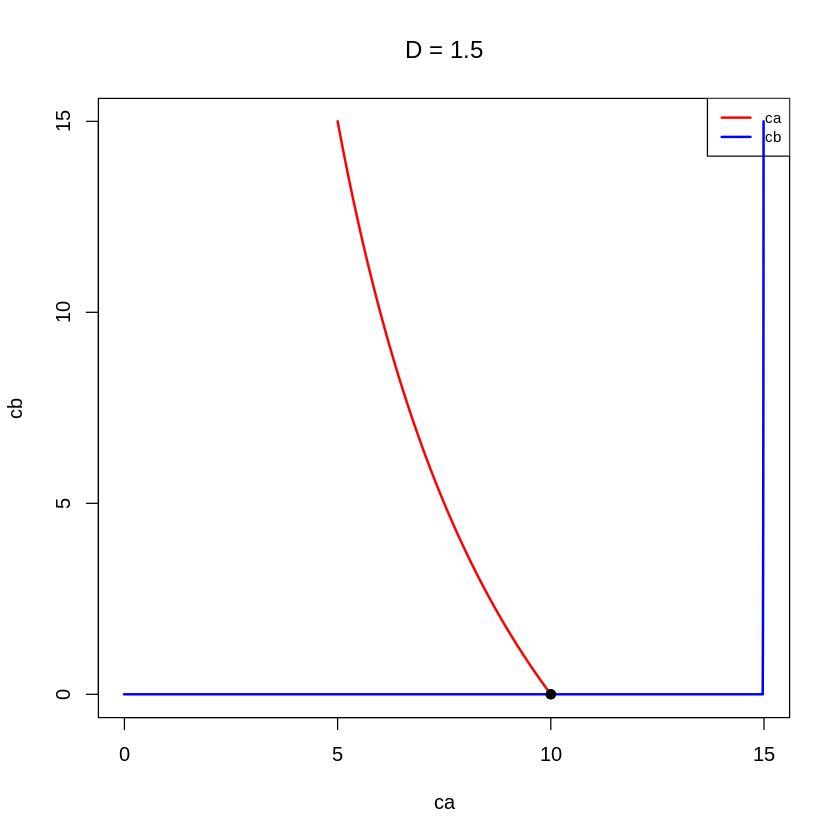

In [82]:
for(D in c(0.1, 0.5, 1, 1.5)) {

  p["D"] <- D
  plane(xmax = 15, ymax = 15, xmin = -0.01, ymin = -0.01, main = paste0("D = ", D))
  newton(state = c(ca = 1, cb = 10), plot = TRUE)
  newton(state = c(ca = 10, cb = 0), plot = TRUE)
}
p["D"] <- 0.1 # regresar al valor inicial 

Vemos algo interesante. Al incrementar el valor del parámetro $D$, de 0.1 hasta 1, vamos cambiando el valor del punto de equilibrio, pero su estabilidad no se modifica. Al llegar al valor $D = 0$, de repente, pasamos a tener un solo punto de equilibrio ($c_{Ass} = c_{Ain}, c_{Bss} = 0$) el cual pasa a ser estable. Si continuamos incrementando el valor del parámetro $D$, ya no modificamos la estabilidad del punto de equilibrio ni tampoco su valor, este permanece igual sin importar cuando crezca $D$. 